In [1]:
from pickle_workaround import pickle_load
from TfidfVectorizer import TfidfVectorizer
from vectorizer import tokenize, extract_requirements
from nlp import get_top_10_docs
from data import get_query_corpus, get_connection
from summaries import summarize_doc, summarize_doc_nmf

import numpy as np
import matplotlib.pyplot as plt

from wordcloud import WordCloud
from IPython.display import Image, display

In [2]:
_ = get_connection("/home/mark/Documents/missionmark/missionmark_db_creds")

query = """
           SELECT opportunity_id, program_description
           FROM import.govwin_opportunity
           WHERE program_description ILIKE('%REQUIREMENTS%');
        """
doc_ids, corpus_full = get_query_corpus(query, True)
# corpus = np.array([extract_requirements(doc) for doc in corpus_full])
corpus = corpus_full

Connecting to Postgres database...
 -> Connection successful!
Loading corpus...
 -> 8851 documents loaded!


In [3]:
tfidf = TfidfVectorizer(pickle_load("../output/CountVectorizer.pkl"), pickle_load("../output/TfidfTransformer.pkl"))
# tfidf_corpus = pickle_load("../output/tfidf_corpus.pkl")
tfidf_corpus = tfidf.transform(corpus)
vocabulary = tfidf.get_feature_names()

Loading ../output/CountVectorizer.pkl from cache...
 -> ../output/CountVectorizer.pkl loaded!
Loading ../output/TfidfTransformer.pkl from cache...
 -> ../output/TfidfTransformer.pkl loaded!


In [25]:
nmf = pickle_load("../output/NMF.pkl")
H = nmf.components_
W = nmf.transform(tfidf_corpus)
W_max = W.max(axis = 0)
W_normalized = W / W_max

Loading ../output/NMF.pkl from cache...
 -> ../output/NMF.pkl loaded!


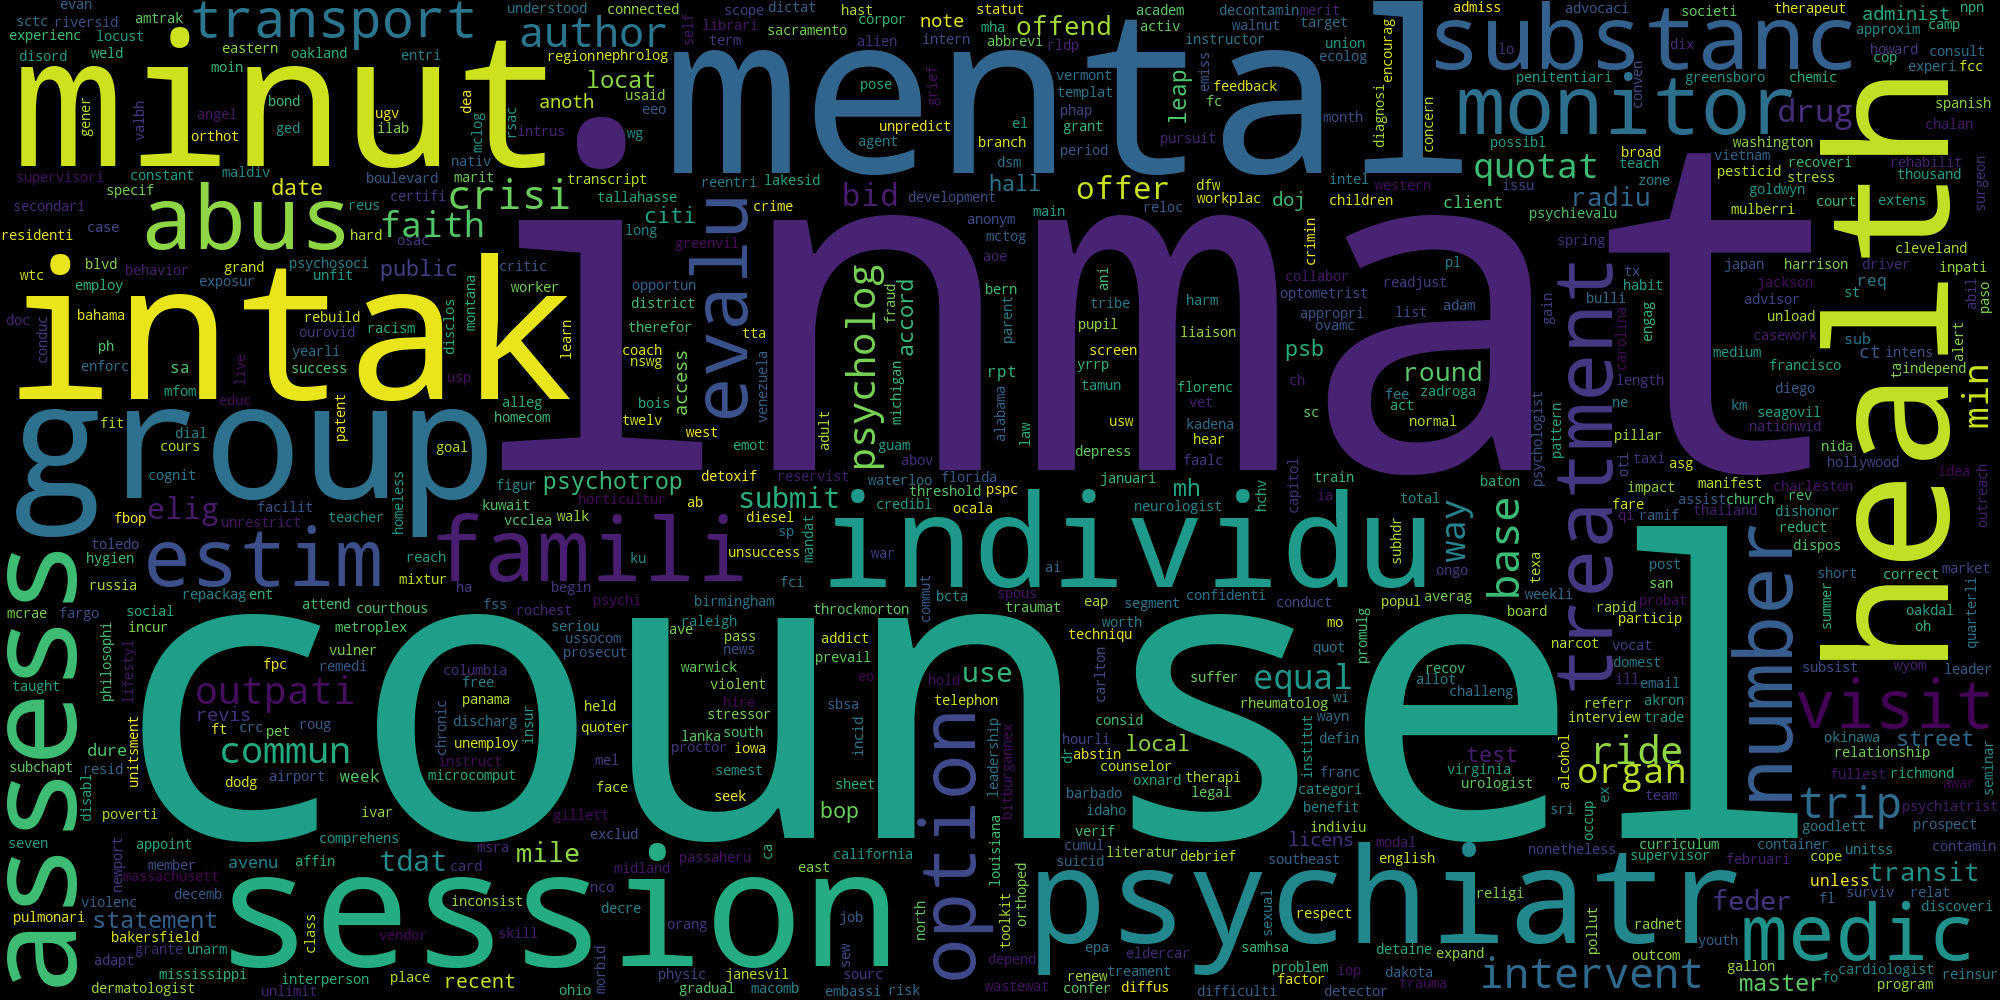

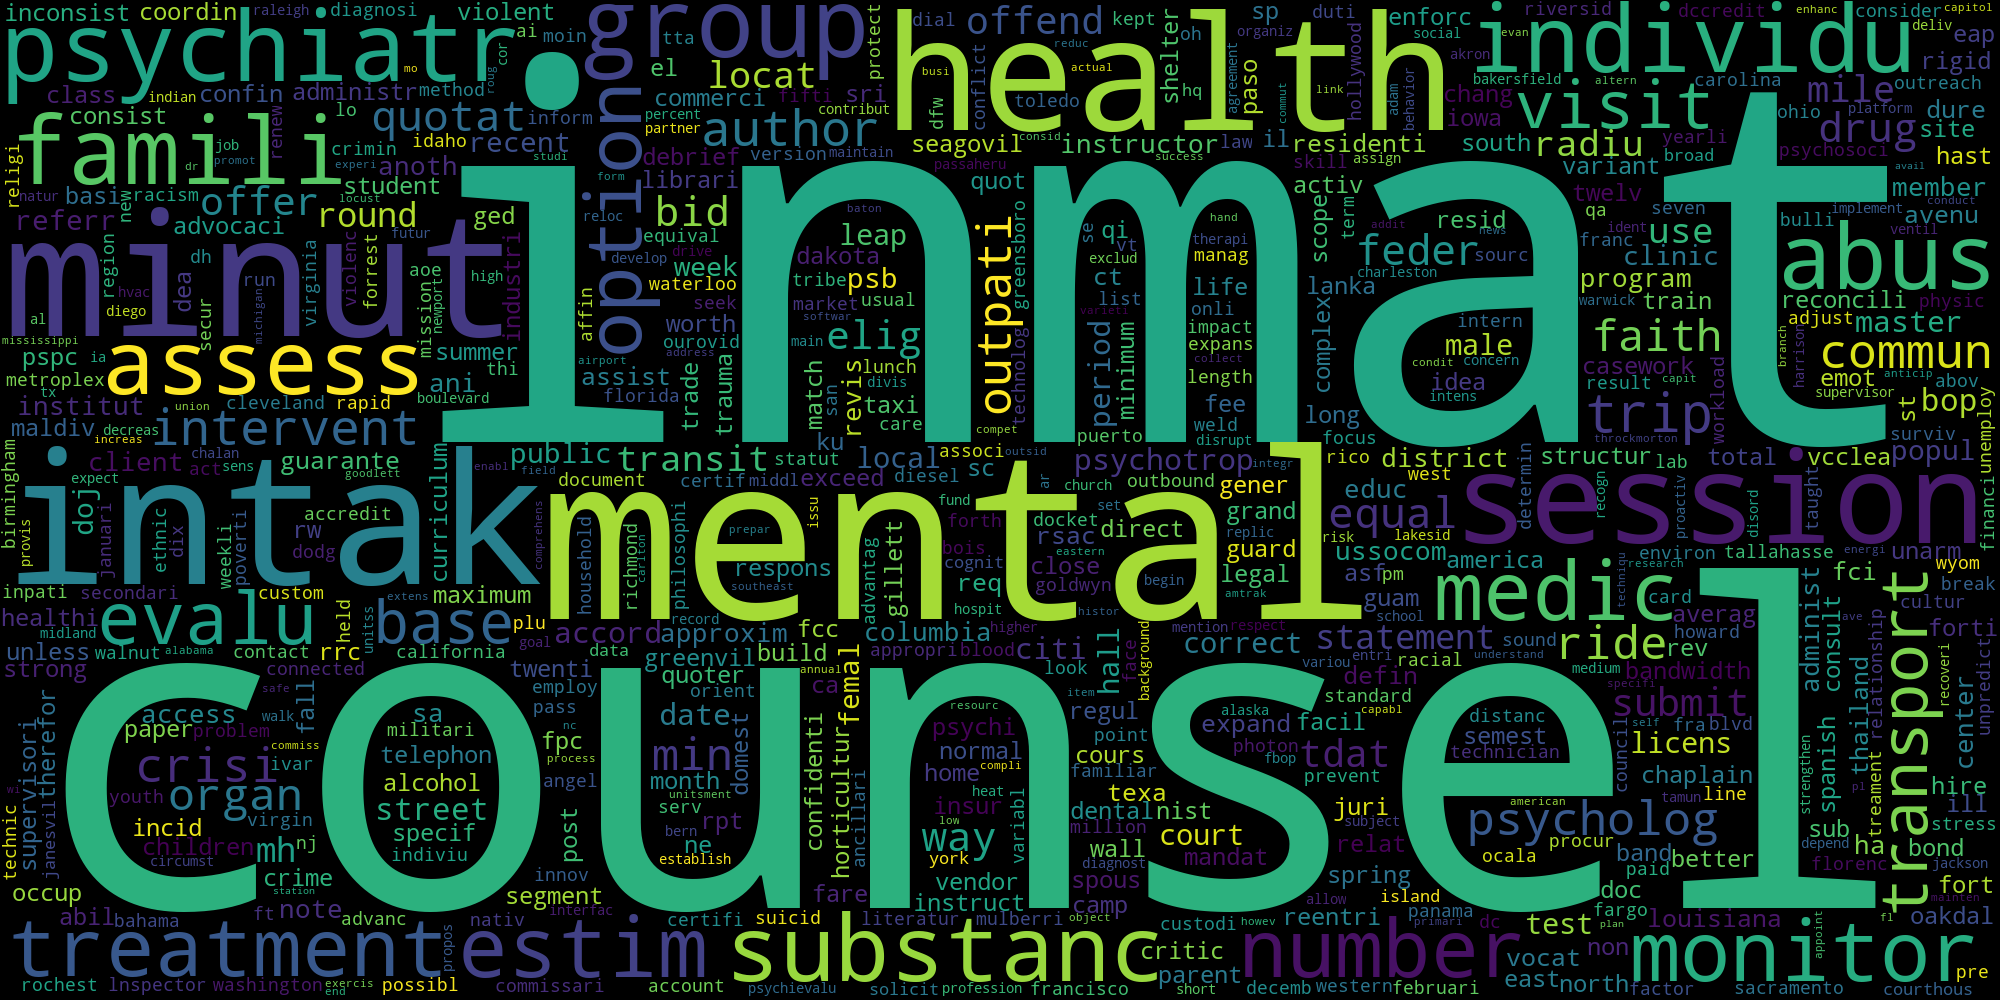

*************************************************************
154868 -> STRENGTH: 1.0 (0.2629)
PREVIOUS REQUIREMENTS                                                           
The Contract shall provide Substance Abuse and Mental Health Treatment Services:
Base Year: Estimated number of inmates 75:
Substance Abuse Treatment Services:
Intake Assessments & Report (2011) (1 per inmate) x 75 inmates = 75 units
Individual Counseling Sessions (2010) (30 minutes = 1 unit) 48 units (per inmate) x 75 = 3,600 units
Group Counseling Sessions (2020) (30 minutes = 1 unit) 72 units (per inmate) x 75 = 5,400 units
Family Counseling (2030) (30 minutes = 1 unit) 12 units (per inmate) x 75 inmates = 900 units
Mental Health Treatment Services:
Mental Health Intake Assessment & Report (5011) (1 per inmate) x 9 inmates = 9 units
Psychiatric Evaluation & Report (5030) (1 per inmate) x 9 inmates = 9 units
Mental Health Individual Counseling (6010) (30 minutes =1 unit) 12 units per inmate x 9 inmates = 108 un

PREVIOUS REQUIREMENTS                                                           
The Scope of Work includes:
Base Year: Estimated number of inmates 65:
Substance Abuse Treatment Services:
Intake Assessments & Report (2011) (1 per inmate) x 65 inmates = 65 units
Individual Counseling Sessions (2010) (30 minutes = 1 unit) 48 units (per inmate) x 65 = 3,120 units
Group Counseling Sessions (2020) (30 minutes = 1 unit) 72 units (per inmate) x 65 = 4,680 units
Family Counseling (2030) (30 minutes = 1 unit) 12 units (per inmate) x 5 inmates = 60 units
Mental Health Treatment Services:
Mental Health Intake Assessment & Report (5011) (1 per inmate) x 15 inmates = 15 units
Mental Health Individual Counseling (6010) (30 minutes =1 unit) 24 units per inmate x 15 inmates = 360 units
Mental Health Group Counseling (6020) (30 minutes = 1 unit) 36 units per inmate x 15 inmates = 540 units
Psychiatric Evaluation & Report (5030) (1 per inmate) x 15 inmates = 15 units
Medication Monitoring (6051) (one vi

PREVIOUS REQUIREMENTS:                                                          
Provide community-based outpatient substance abuse and mental health treatment services
Base Year: Estimated Substance Abuse number of inmates 30
Intake Assessments (2011) (one per inmate) for 6 inmates = 6 assessments each
Individual Counseling Sessions (2010) (30 minutes = 1 unit) 52 units (per inmate) x 63 = 1560 each
Group Counseling Sessions (2020) (30 minutes = 1 unit) 78 units (per inmate) x 30 = 2340 each
Family Counseling Sessions (2030) (30 minutes = 1 unit) 20 units (per inmate) x 5 = 100 each
Psychiatric Evaluation & Report (5030) (one per inmate) for 15 inmates = 15 each
Mental Health Intake Assessment and Report (5011) (one per inmate) for 5 inmates = 5 each
Individual Counseling - Mental Health (6010) 52 units per inmate for 10 inmates = 520 each
Mental Health Medication Monitoring (6051)12 units per inmate for 10 inmates = 120 each
Option Year One: Estimated Substance Abuse number of inmate

PREVIOUS REQUIREMENTS:                                                          
The requirement for Transitional Drug Abuse Treatment and Mental Health Services for male and female Federal offenders includes:
Base Year: Estimated number of inmates 70:
Substance Abuse Treatment Services:
Intake Assessments & Report (2011) (1 per inmate) x 70 inmates = 70 units
Individual Counseling Sessions (2010) (30 minutes = 1 unit) 48 units (per inmate) x 70 = 3,360 units
Group Counseling Sessions (2020) (30 minutes = 1 unit) 72 units (per inmate) x 70 = 5,040 units
Family Counseling (2030) (30 minutes = 1 unit) 12 units (per inmate) x 70 inmates = 840 units
Mental Health Treatment Services:
Mental Health Intake Assessment & Report (5011) (1 per inmate) x 35 inmates = 35 units
Psychiatric Evaluation & Report (5030) (1 per inmate) x 35 inmates = 35 units
Mental Health Individual Counseling (6010) (30 minutes =1 unit) 48 units per inmate x 35 inmates = 1,680 units
Mental Health Group Counseling (6020

PREVIOUS REQUIREMENTS:                                                          
The DOJ/BOP has a requirement for:
Base Year: Estimated number of Inmates = 23
Substance Abuse Treatment Services:
Intake Assessments & Report (one per authorized inmate) for 23 inmates = 23 assessments
Individual Counseling Sessions (30 minutes = 1 unit) 48 units (per inmate) x 23 = 1104 units
Group Counseling Sessions (30 minutes = 1 unit) 72 units (per inmate) x 23= 1656 units
Family Counseling (30 minutes = 1 unit) 12 units (per inmate) x 23 inmates = 276 units
Mental Health Treatment Services:
Estimated number of Inmates = 8
Mental Health Intake Assessment & Report (one per inmate) for 8 inmates = 8 units
Psychiatric Evaluation & Report = 1 report per authorized inmate x 8 inmates = 8 reports
Mental Health Individual Counseling (30 minutes =1 unit) 12 units per inmate for 8 inmates = 96 units
Mental Health Group Counseling (30 minutes = 1 unit) 24 units per inmate for 8 inmates = 192 units
Mental Heal

In [29]:
topic_i = 1

display(Image(filename=f"../static/wordclouds/{topic_i}_nmf_wordcloud.png"))
display(Image(filename=f"../static/wordclouds/{topic_i}_tfidf_wordcloud.png"))

for doc, strength in get_top_10_docs(W_normalized, topic_i):
    print("*************************************************************")
    print(doc_ids[doc], "-> STRENGTH:", round(strength, 2), f"({round(W[doc, topic_i], 4)})")
    print(summarize_doc_nmf(corpus[doc], tfidf, nmf, topic_i, n_sentences=1))
    #print(summarize_doc(doc))
    print()

(array([1., 0., 3., 0., 1., 2., 0., 1., 0., 2.]),
 array([0.3771594 , 0.43944346, 0.50172752, 0.56401158, 0.62629564,
        0.6885797 , 0.75086376, 0.81314782, 0.87543188, 0.93771594,
        1.        ]),
 <a list of 10 Patch objects>)

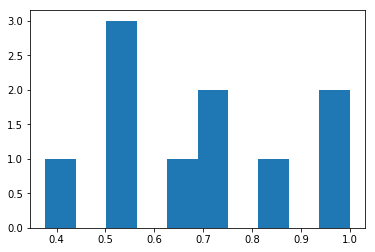

In [30]:
topic_strengths = W.max(axis=0) / W.max()
plt.hist(topic_strengths)
# for i, strength in enumerate(W.max(axis=0) / W.max()):
#     print(str(i).rjust(2, "0"), "->", str(round(strength, 2)).ljust(4, "0"))